# Air Quality Classification Using Support Vector Machine Methode

Data bersumber dari Kaggle (https://www.kaggle.com/code/renjiabarai/air-condition-classification/input?select=air_quality_health_impact_data.csv)

ID Rekaman
* RecordID: Pengidentifikasi unik yang diberikan pada setiap rekaman (1 hingga 2392).

Metrik Kualitas Udara
* AQI: Indeks Kualitas Udara, ukuran seberapa tercemar udara saat ini atau seberapa tercemar udara diperkirakan akan menjadi.
* PM10: Konsentrasi partikel yang berdiameter kurang dari 10 mikrometer (μg/m³).
* PM2_5: Konsentrasi partikel yang berdiameter kurang dari 2.5 mikrometer (μg/m³).
* NO2: Konsentrasi nitrogen dioksida (ppb).
* SO2: Konsentrasi sulfur dioksida (ppb).
* O3: Konsentrasi ozon (ppb).

Kondisi Cuaca
* Temperature: Suhu dalam derajat Celsius (°C).
* Humidity: Persentase kelembaban (%).
* WindSpeed: Kecepatan angin dalam meter per detik (m/s).

Metrik Dampak Kesehatan
* RespiratoryCases: Jumlah kasus pernapasan yang dilaporkan.
* CardiovascularCases: Jumlah kasus kardiovaskular yang dilaporkan.
* HospitalAdmissions: Jumlah penerimaan rumah sakit yang dilaporkan.

Variabel Target: Kelas Dampak Kesehatan
* HealthImpactScore: Skor yang menunjukkan dampak kesehatan keseluruhan berdasarkan kualitas udara dan faktor terkait lainnya, berkisar dari 0 hingga 100.
* HealthImpactClass: Klasifikasi dampak kesehatan berdasarkan skor dampak kesehatan:
- 0: 'Sangat Tinggi' (HealthImpactScore >= 80)
- 1: 'Tinggi' (60 <= HealthImpactScore < 80)
- 2: 'Sedang' (40 <= HealthImpactScore < 60)
- 3: 'Rendah' (20 <= HealthImpactScore < 40)
- 4: 'Sangat Rendah' (HealthImpactScore < 20)

# Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
import matplotlib.ticker as tick

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv(r"D:\Kuliah\Semester 6\Analisis Data\Data\air_quality_health_impact_data.csv")
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [3]:
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 5811
Number of Columns	: 15


# Data Cleaning

In [4]:
dr= pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in df.isnull().sum().values / len(df) * 100],
    "unique":[df[i].nunique() for i in df.columns],
    "duplicated": df.duplicated().sum(),
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)
dr

,type,null,null_percentage,unique,duplicated,sample
RecordID,int64,0,0.00%,5811,0,783.000000
AQI,float64,0,0.00%,5811,0,314.367008
PM10,float64,0,0.00%,5811,0,202.200411
PM2_5,float64,0,0.00%,5811,0,138.993492
NO2,float64,0,0.00%,5811,0,179.969601
SO2,float64,0,0.00%,5811,0,69.960575
O3,float64,0,0.00%,5811,0,299.236250
Temperature,float64,0,0.00%,5811,0,1.790690
Humidity,float64,0,0.00%,5811,0,55.988741
WindSpeed,float64,0,0.00%,5811,0,11.187674


In [5]:
# Menjadikan 'RecordID' sebagai index
df.set_index('RecordID', inplace=True)

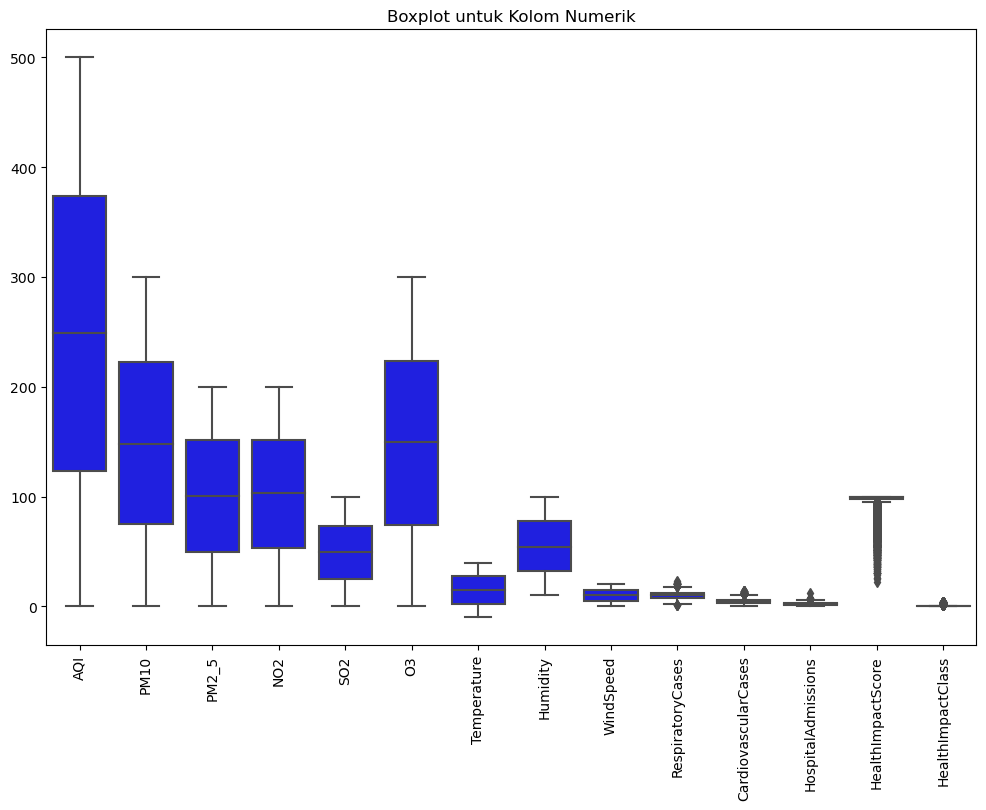

In [6]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(df, showfliers=True, color='blue') 
plt.title('Boxplot untuk Kolom Numerik')
plt.xticks(rotation='vertical') 
plt.show()

# Data Exploration Analysis

In [7]:
# Menyimpan dan menghapus kolom 'HealthImpactClass' sementara
dc = df.drop(columns=['HealthImpactClass'])

In [8]:
# Menampilkan statistik deskriptif tanpa kolom 'HealthImpactClass'
dc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AQI,5811.0,248.438476,144.777638,0.005817,122.951293,249.127841,373.630668,499.858837
PM10,5811.0,148.654997,85.698500,0.015848,75.374954,147.634997,222.436759,299.901962
PM2_5,5811.0,100.223714,58.096612,0.031549,49.435171,100.506337,151.340260,199.984965
NO2,5811.0,102.293445,57.713175,0.009625,53.538538,102.987736,151.658516,199.980195
SO2,5811.0,49.456838,28.530329,0.011023,24.887264,49.530165,73.346617,99.969561
O3,5811.0,149.312431,86.534240,0.001661,73.999665,149.559871,223.380126,299.936812
Temperature,5811.0,14.975500,14.483067,-9.990998,2.481500,14.942428,27.465374,39.963434
Humidity,5811.0,54.776853,26.020786,10.001506,31.995262,54.543904,77.641639,99.997493
WindSpeed,5811.0,9.989177,5.776950,0.002094,4.952343,10.051742,14.971840,19.999139
RespiratoryCases,5811.0,9.974187,3.129234,1.000000,8.000000,10.000000,12.000000,23.000000


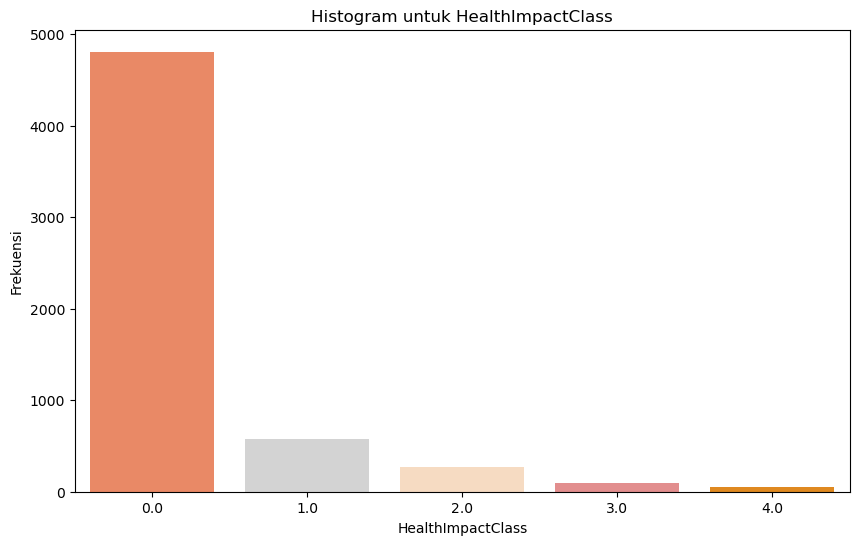

In [9]:
# Menampilkan histogram untuk variabel 'HealthImpactClass'
plt.figure(figsize=(10, 6))
sns.countplot(x='HealthImpactClass', data=df, palette=['coral', 'lightgrey', 'peachpuff', 'lightcoral', 'darkorange'])
plt.title('Histogram untuk HealthImpactClass')
plt.xlabel('HealthImpactClass')
plt.ylabel('Frekuensi')
plt.show()

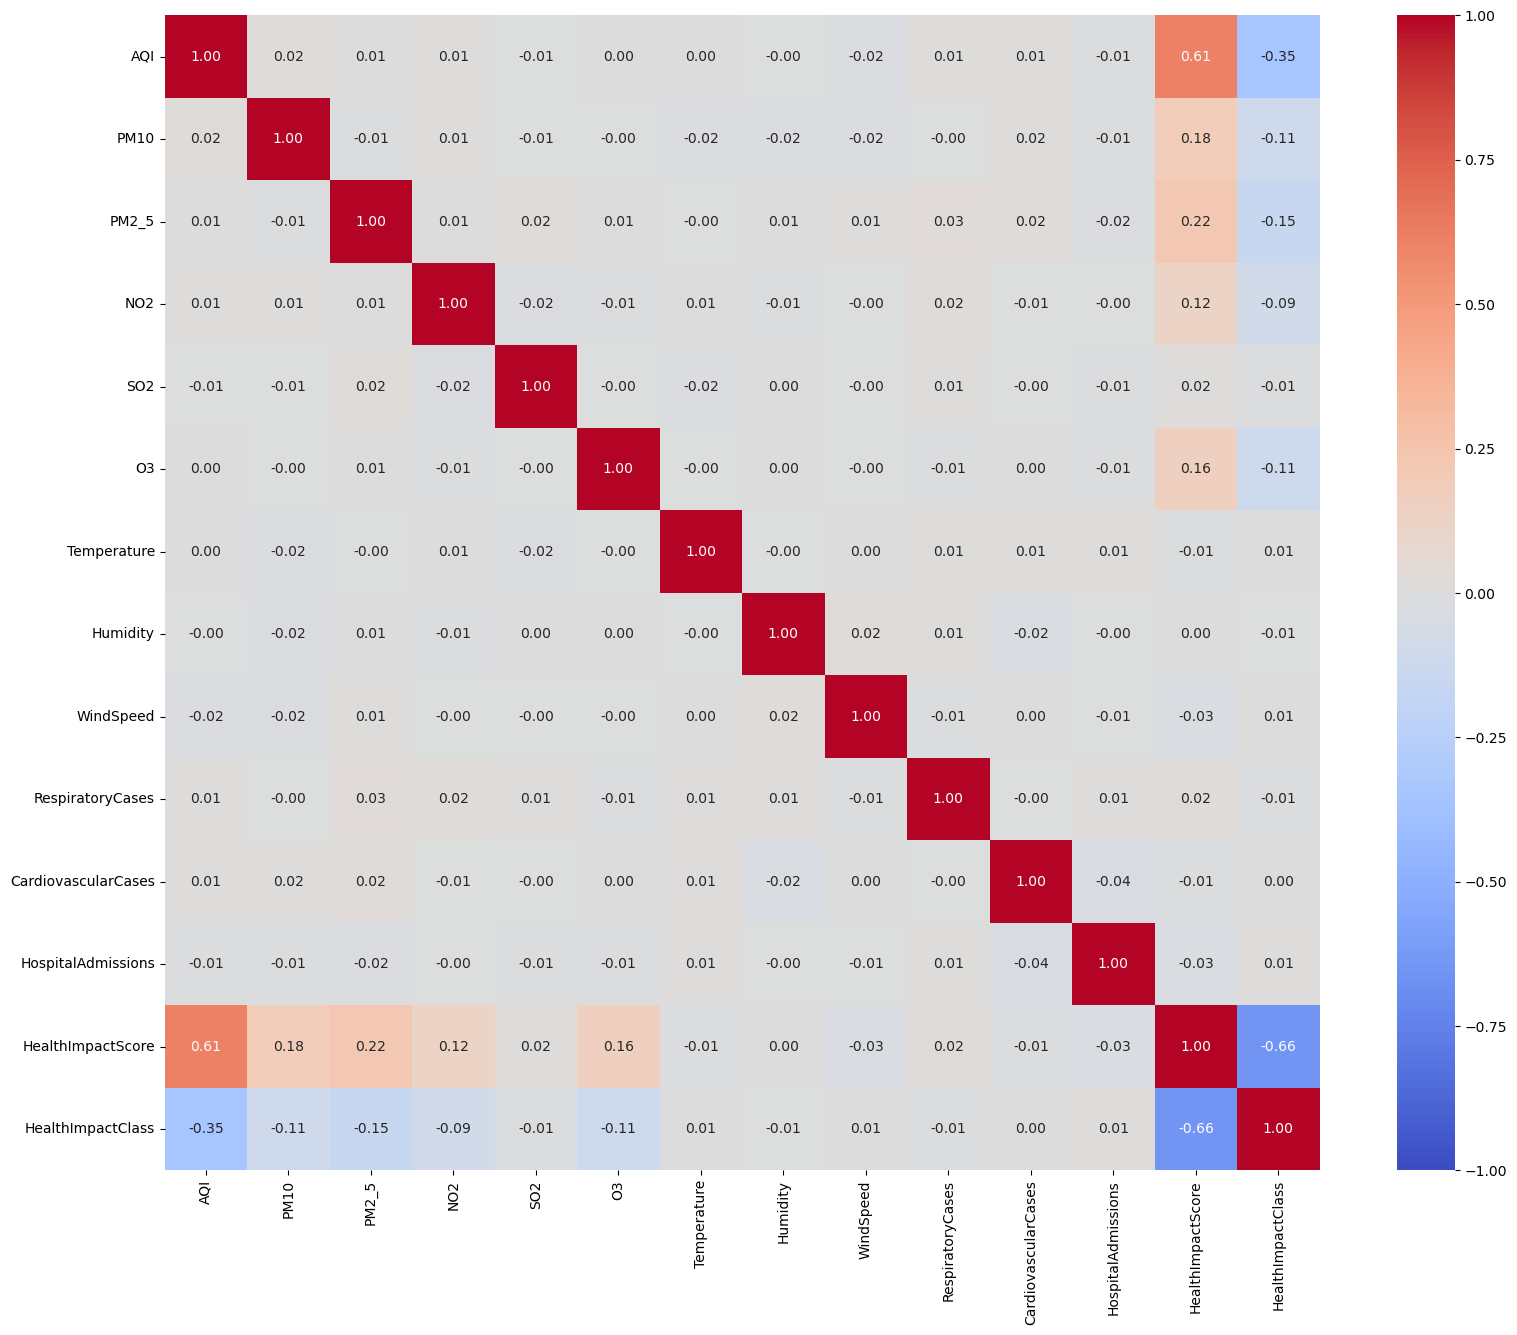

In [10]:
# Menampilkan heatmap korelasi dengan menggunakan dython
corr = associations(df, figsize=(20, 15), cmap='coolwarm')

# Data Preprocessing

In [11]:
# Defenisiskan data
X= df.drop('HealthImpactClass', axis=1)
y= df['HealthImpactClass']

In [12]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [13]:
# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Cetak jumlah data pada masing-masing set
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)
print("Shape of X Train: ", X_train_scaled.shape)
print("Shape of Y Train: ", y_train.shape)
print("Shape of X Test: ", X_test_scaled.shape)
print("Shape of Y Test: ", y_test.shape)

Shape of X: (5811, 13)
Shape of Y: (5811,)
Shape of X Train:  (4648, 13)
Shape of Y Train:  (4648,)
Shape of X Test:  (1163, 13)
Shape of Y Test:  (1163,)


# Support Vector Machine

1. Definisi:
SVM adalah metode pembelajaran mesin yang mencari garis atau hyperplane yang memisahkan data menjadi dua kelas dengan margin terbesar. Dalam konteks klasifikasi, SVM bertujuan untuk menemukan hyperplane yang memisahkan data dari kelas yang berbeda dengan jarak maksimum di antara kelas-kelas tersebut.

2. Fungsi Kernel:
SVM dapat digunakan untuk data yang tidak dapat dipisahkan secara linier dengan menggunakan fungsi kernel. Fungsi kernel seperti Radial Basis Function (RBF) memungkinkan SVM untuk mengubah data ke ruang berdimensi lebih tinggi di mana data menjadi linier terpisah.

3. Kelebihan dan Kekurangan:
- Kelebihan: SVM sangat efektif dalam ruang berdimensi tinggi dan dengan data yang kompleks. Selain itu, SVM bekerja dengan baik bahkan jika data memiliki batas kelas yang tidak linier.
- Kekurangan: SVM bisa menjadi lambat dalam pelatihan pada dataset besar dan memerlukan pemilihan parameter yang hati-hati.

In [15]:
# Define the SVM model
svm_model = SVC(kernel='rbf')

# Define the parameters for Grid Search
param_grid = {'C': [0.1, 1, 10],
              'gamma': ['scale', 'auto']}

In [16]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']})

In [17]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 10, 'gamma': 'auto'}


In [18]:
# Evaluate the model with best parameters
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled)

In [19]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       971
         1.0       0.85      0.87      0.86       116
         2.0       0.72      0.56      0.63        52
         3.0       0.00      0.00      0.00        19
         4.0       0.00      0.00      0.00         5

    accuracy                           0.94      1163
   macro avg       0.51      0.48      0.49      1163
weighted avg       0.92      0.94      0.93      1163

Confusion Matrix:
[[965   6   0   0   0]
 [ 12 101   3   0   0]
 [ 13  10  29   0   0]
 [ 11   0   8   0   0]
 [  3   2   0   0   0]]


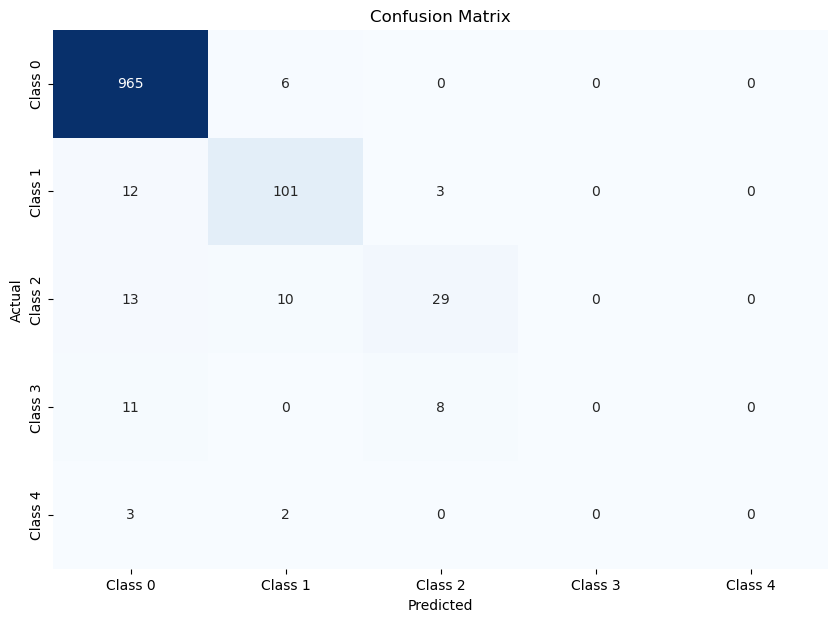

In [20]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

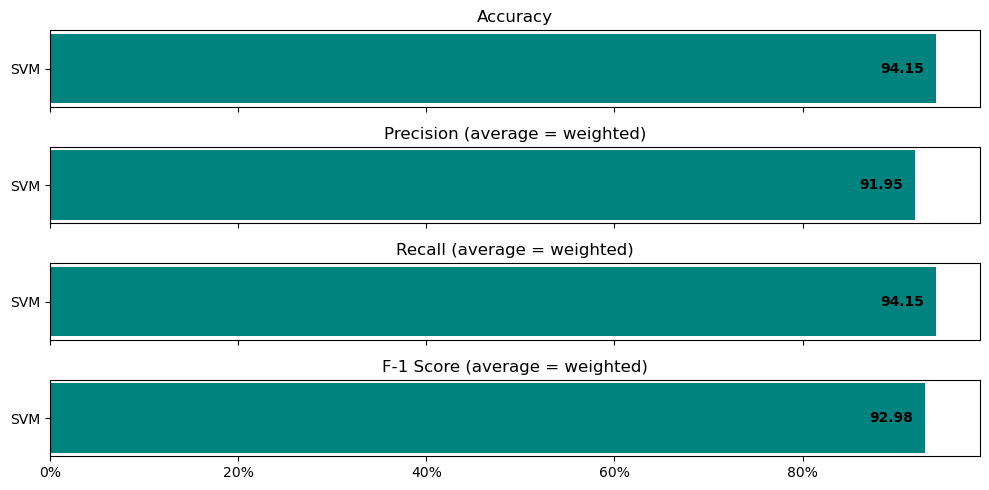

In [21]:
nrows, ncols = 4, 1
fig, ax = plt.subplots(figsize=(10, 5), dpi=100, nrows=nrows, ncols=ncols, sharex=True)

metrics = []

# Loop melalui metrik untuk SVM
for i in range(nrows):
    if i == 0:
        metric = accuracy_score(y_test, y_pred) * 100
        title = "Accuracy"
    elif i == 1:
        metric = precision_score(y_test, y_pred, average="weighted") * 100
        title = "Precision (average = weighted)"
    elif i == 2:
        metric = recall_score(y_test, y_pred, average="weighted") * 100
        title = "Recall (average = weighted)"
    else:
        metric = f1_score(y_test, y_pred, average="weighted") * 100
        title = "F-1 Score (average = weighted)"

    ax[i].barh("SVM", metric, color='#00827F')
    ax[i].set_title(title)

    for container in ax[i].containers:
        ax[i].bar_label(container, fmt="%.2f", padding=-40, color="black", fontweight="bold")

    ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: f"{round(x)}%"))

plt.tight_layout()
plt.show()

- Kelas 0.0 sangat baik dalam hal precision dan recall, menunjukkan bahwa model mampu mengklasifikasikan dengan sangat baik untuk kelas ini.
- Kelas 1.0 juga memiliki performa yang baik, tetapi tidak sebaik kelas 0.0.
- Kelas 2.0 memiliki recall yang lebih rendah, menunjukkan bahwa model kurang efektif dalam mendeteksi instance kelas ini.
- Kelas 3.0 dan 4.0 memiliki nilai precision, recall, dan f1-score yang sangat rendah, menunjukkan bahwa model kesulitan dalam mengklasifikasikan instance dari kelas-kelas ini.

Secara keseluruhan, model menunjukkan performa yang sangat baik untuk kelas 0.0 dan 1.0, tetapi kurang efektif untuk kelas dengan dukungan yang lebih rendah seperti kelas 3.0 dan 4.0. Anda mungkin perlu mempertimbangkan teknik penyeimbangan kelas atau algoritma lain untuk meningkatkan performa pada kelas-kelas yang kurang terwakili. Hal ini terjadi dikarenakan adanya penyimpangan data yang sangat signifikan Dimana kelas 0 sebagai data terbanyak dibandingkan kelas lainnya. Sehingga pada saat pembagian data train dan test kelas 3 dan 4 tidak masuk dalam data test.

In [22]:
mean=mean_absolute_error(y_test,y_pred)
root=np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:", mean)
print("Root Mean Squared Error:", root)
print("R Squared:", r2)

Mean Absolute Error: 0.0997420464316423
Root Mean Squared Error: 0.4691698821662578
R Squared: 0.48713213761550067


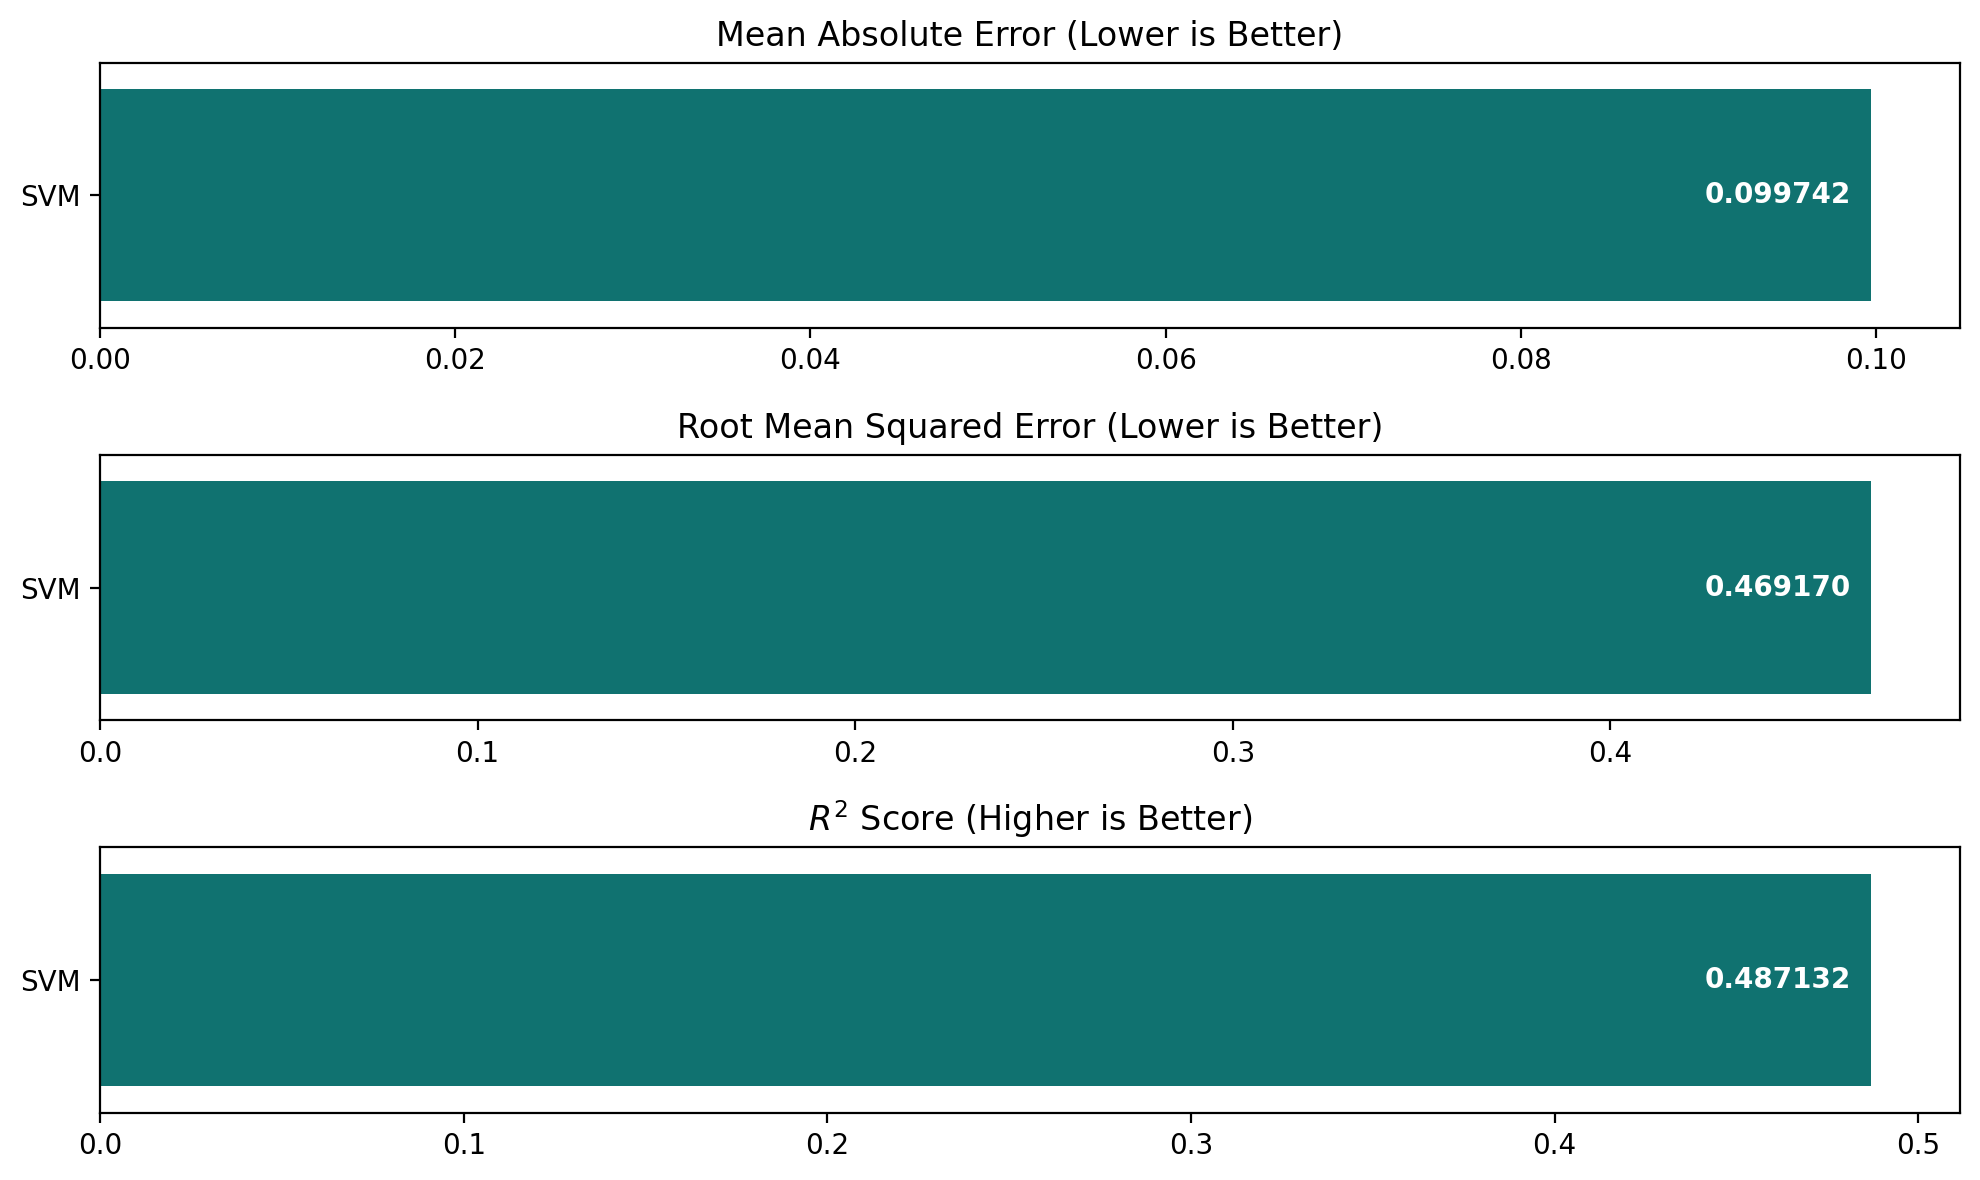

In [23]:
# Visualization

fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,y_pred)],
    y=["SVM"],
    palette=['#00827F'],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,y_pred))],
    y=["SVM"],
    palette=['#00827F'],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,y_pred)],
    y=["SVM"],
    palette=['#00827F'],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

1.	Mean Absolute Error (MAE):
MAE adalah rata-rata dari selisih absolut antara nilai yang diprediksi dan nilai aktual. Nilai MAE memberikan gambaran seberapa besar kesalahan prediksi rata-rata. Dalam kasus ini, rata-rata kesalahan prediksi adalah sekitar 0.0997.

2.	Root Mean Squared Error (RMSE):
RMSE adalah akar kuadrat dari rata-rata kuadrat selisih antara nilai yang diprediksi dan nilai aktual. RMSE memberikan gambaran seberapa besar kesalahan prediksi dengan memperbesar dampak kesalahan besar karena adanya kuadrat. Dalam kasus ini, nilai RMSE adalah sekitar 0.4692. 

3.	R Squared (R²):
adalah koefisien determinasi yang mengukur proporsi variabilitas dalam data yang dapat dijelaskan oleh model. Nilai R² berkisar antara 0 dan 1, di mana nilai yang lebih dekat ke 1 menunjukkan model yang lebih baik dalam menjelaskan variabilitas data. Dalam kasus ini, nilai R² adalah sekitar 0.4871, yang berarti model menjelaskan sekitar 48.71% variabilitas dari data. Ini menunjukkan bahwa model memiliki kemampuan moderat dalam memprediksi nilai, tetapi masih ada ruang untuk peningkatan.

# Kesimpulan